In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format = 'retina'



In [2]:
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

import numpy as np
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

import pandas as pd
pd.set_option('display.max_columns', 150)
#pd.set_option('precision', 5)

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor,RandomizedLasso
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor


In [3]:
os.getcwd()
!ls

'/Users/zacklarsen/Desktop/Inference Analytics'

ALL3.ipynb
Adeel Qureshi Assessor.ipynb
Airbnb Analytics.ipynb
AirbnbChicago.csv
AirbnbLA.csv
AirbnbNYC.csv
AirbnbOakland.csv
AirbnbSF.csv
AirbnbSanDiego.csv
Ames_9_21_2017_backup.ipynb
CSC 529 Final.ipynb
California.png
Cap Rate or Gross Rent Multiplier to Estimate Property Value?.pdf
CountDF.csv
Exploratory- CA.txt.ipynb
Exploratory-Rental Crawl Sample.xlsx.ipynb
Exploratory.R
FirstAMListing.ipynb
IA.png
Important features.docx
King Country.twb
King County House Sales Kaggle.ipynb
Markezafile assessment.docx
Notes.docx
Real Estate Data Services.pdf
RentCrawlModel.csv
Standup Notes.docx
Tableau.twb
TensorFlow Tutorial.ipynb
Tuesday.csv
Untitled.ipynb
content_docker.png
kc_house_data.csv
neighborhoods.csv
properties_2016.csv
sample_submission.csv
train_2016_v2.csv
zillow_data_dictionary.xlsx
~$C 595 Interactive Data Visualization Textbook Notes.docx


In [4]:
KING = pd.read_csv('kc_house_data.csv',sep=',',error_bad_lines=False,parse_dates=['date'])

In [5]:
KING.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [7]:
# Select our independent variables to feed into the regression model as 'X'
X = KING.ix[:,np.r_[3:21]]
X.head(4)


index = KING.ix[:,np.r_[0:2]]
index.head(4)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


,id,date
0,7129300520,2014-10-13
1,6414100192,2014-12-09
2,5631500400,2015-02-25
3,2487200875,2014-12-09


In [9]:
col1 = np.ones(len(X))
col1

array([ 1.,  1.,  1.,  1., ...,  1.,  1.,  1.,  1.])

In [10]:
# In order to do multiple regression we need to add a column of 1s for x0
X = np.array([np.concatenate((X,col1))])

ValueError: all the input arrays must have same number of dimensions

In [11]:
# standardize the numeric independent predictor variables 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_s

array([[-0.4 , -1.45, -0.98, -0.23, ..., -0.35, -0.31, -0.94, -0.26],
       [-0.4 ,  0.18,  0.53, -0.19, ...,  1.16, -0.75, -0.43, -0.19],
       [-1.47, -1.45, -1.43, -0.12, ...,  1.28, -0.14,  1.07, -0.17],
       [ 0.68,  1.15, -0.13, -0.24, ..., -0.28, -1.27, -0.91, -0.28],
       ..., 
       [ 0.68,  0.5 ,  0.25, -0.22, ..., -0.36, -1.05, -0.23, -0.2 ],
       [-1.47, -1.77, -1.15, -0.33, ...,  0.25, -0.6 , -1.41, -0.39],
       [-0.4 ,  0.5 , -0.52, -0.31, ..., -0.18,  1.03, -0.84, -0.42],
       [-1.47, -1.77, -1.15, -0.34, ...,  0.25, -0.6 , -1.41, -0.42]])

In [13]:
# Select the price column as our dependent target variable
Y = KING.ix[:,2]
Y.head(4)

0    221900.0
1    538000.0
2    180000.0
3    604000.0
Name: price, dtype: float64

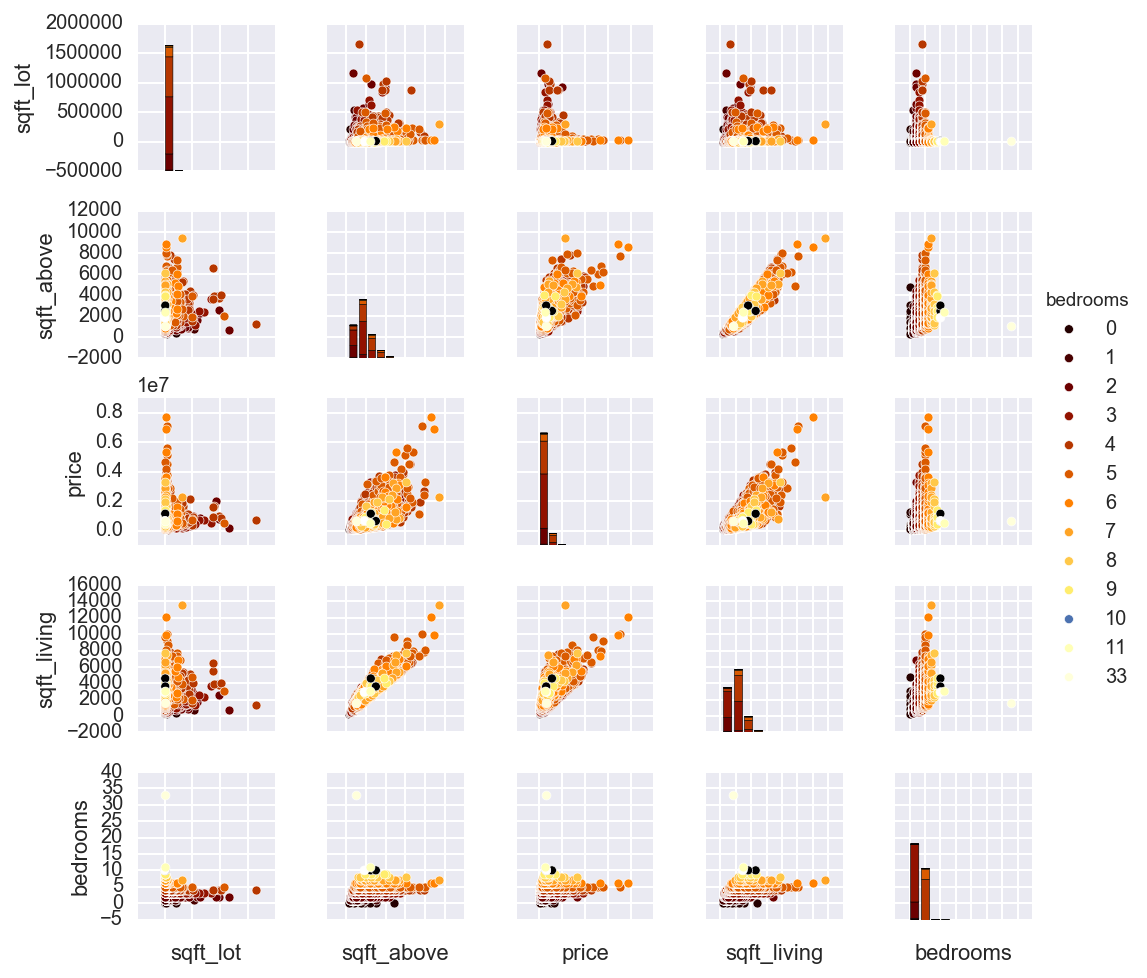

In [14]:
g = sns.pairplot(KING[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='afmhot',size=1.4)
g.set(xticklabels=[])

In [82]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, Y, test_size=0.2, random_state=33)

In [87]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_s,Y)

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
# Let's see predictions for the first 10 instances
print linreg.predict(X_s[:10])

[  208727.04   733839.04   380055.04   455535.04   440833.04  1456671.04   273730.04   131879.04   326943.04   249161.04]


In [90]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(X_s)
# Now we can constuct a vector of errors
err = abs(p-Y)

# Let's see the error on the first 10 predictions
print err[:10]

0     13168.027364
1    195840.981554
2    200056.448383
3    148463.019148
4     69168.392291
5    231696.696749
6     16225.192620
7    159965.851728
8     97438.126768
9     73838.762115
Name: price, dtype: float64


In [91]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

201164.684613


In [92]:
# We can view the regression coefficients
print 'Regression Coefficients: \n', linreg.coef_

Regression Coefficients: 
[ -3.29e+04   3.18e+04  -6.30e+16   5.34e+03   3.60e+03   5.04e+04   4.05e+04   1.72e+04   1.13e+05   5.68e+16
   3.04e+16  -7.69e+04   7.96e+03  -3.12e+04   8.35e+04  -3.02e+04   1.49e+04  -1.04e+04]


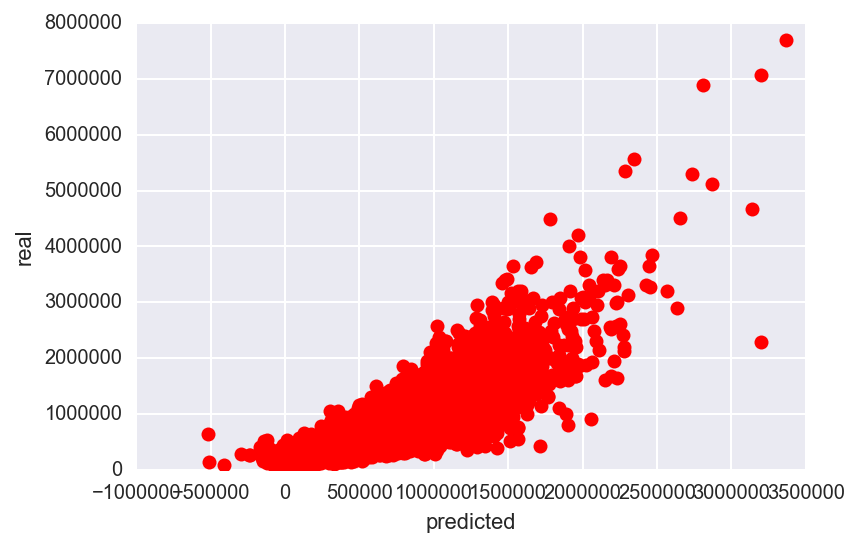

In [97]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y,'ro')
#pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()